# Final Workshop

### Preprocessing

In [2]:
import os
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

from sklearn import ensemble
#from sklearn import linear_model

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Read in csv data
path_name = 'data/covtype.csv'
forest_data = pd.read_csv(path_name)

In [4]:
# separate the target feature in an array `y` and drop it from the rest of the data `X`
y = forest_data['Cover_Type']
X = forest_data.drop(['Cover_Type'] , axis = 1)
labels = X.columns

Since today we will not just train a model but also adjust and look for good hyperparameters, we split the data set in a training set, a validation set for hyperparameter tuning and a test set. The test set will be used in the end to measure the performance of our final model. We suggest a 70/15/15 split. 

**Task:** Make sets X_train, X_val, X_test and y_train, y_val, y_test

(406708, 54) (174304, 54) (87152, 54)


## Decision Trees

The goal of todays notebook is to classify the cover type of a given instance as in the forest data set. As a model we will use a decision tree. We recomend to use the sklearn library. [Here](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) you can find out more. Below you can see all the different parameters with their default value in form of a dictionary, although we do not need to specify or change most of them. Let's start with a simple tree with maximal depth 2.
For comparibility and reproducability we will set the random_state to 1.

In [6]:
params = {
    'criterion': 'gini', # {“gini”, “entropy”}, default=”gini”
    'splitter': 'best', # {“best”, “random”}, default=”best”
    'max_depth': None, # int, default=None
    'min_samples_split': 2, # int or float, default=2
    'min_samples_leaf': 1, # int or float, default=1
    'min_weight_fraction_leaf': 0.0, # float, default=0.0
    'max_features': None, # int, float or {“auto”, “sqrt”, “log2”}, default=None
    'random_state': None, # int, RandomState instance or None, default=None
    'max_leaf_nodes': None, # int, default=None
    'min_impurity_decrease': 0.0, # float, default=0.0
    'class_weight': None, # dict, list of dict or “balanced”, default=None
    'ccp_alpha': 0.0 # non-negative float, default=0.0
}

In [7]:
# first simple decision tree with parameters mentioned above

params['random_state'] = 1
params['max_depth'] = 2

dtc = DecisionTreeClassifier(**params)
dtc.fit(X_train, y_train)
print("Train accuracy: ",  dtc.score(X_train, y_train), "Validation accuracy: ", dtc.score(X_val, y_val))

Train accuracy:  0.6704687392428966 Validation accuracy:  0.6685560859188544


For a better understanding we can take a look at the tree structure:

depth:  2


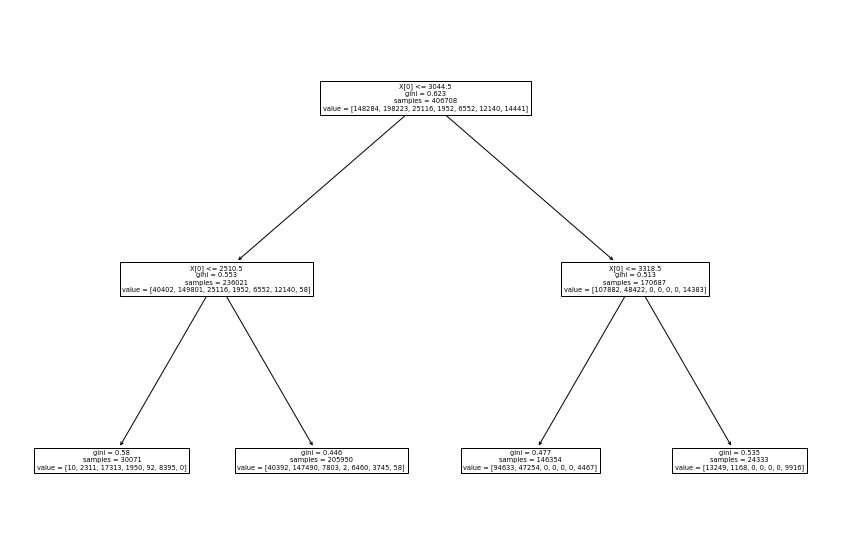

In [8]:
# Let's find out the actual depth of our tree:
print("depth: ", dtc.get_depth())

# and also have a look at the structure itself:
plt.figure(figsize=(15, 10))
tree.plot_tree(dtc);
plt.show()

We can also find out how large the contribution of individual features is for our decision tree, i.e. the feature importance, and visualize it afterwards (the plot idea is from [here](https://www.datacamp.com/community/tutorials/random-forests-classifier-python))

In [9]:
feature_imp = pd.Series(dtc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp

Elevation                             1.0
Soil_Type27                           0.0
Soil_Type16                           0.0
Soil_Type17                           0.0
Soil_Type18                           0.0
Soil_Type19                           0.0
Soil_Type20                           0.0
Soil_Type21                           0.0
Soil_Type22                           0.0
Soil_Type23                           0.0
Soil_Type24                           0.0
Soil_Type25                           0.0
Soil_Type26                           0.0
Soil_Type28                           0.0
Aspect                                0.0
Soil_Type29                           0.0
Soil_Type30                           0.0
Soil_Type31                           0.0
Soil_Type32                           0.0
Soil_Type33                           0.0
Soil_Type34                           0.0
Soil_Type35                           0.0
Soil_Type36                           0.0
Soil_Type37                       

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


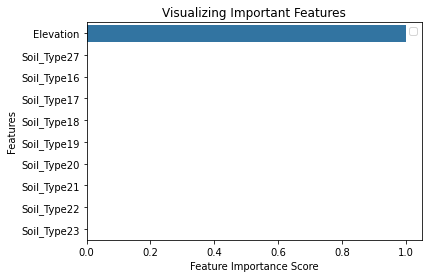

In [10]:
# visualizing the top ten
sns.barplot(x=feature_imp.iloc[:10], y=feature_imp.iloc[:10].index)

plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

We can see that it only uses one single feature to predict the cover type. Also the validation accuracy is not yet where we want it to be. Since the training accuracy is also still quite low, we can assume that our model is underfitting, e.g. the model is not complex enough to represent the given distribution. 
Let's adjust our hyperparameters to find a better model. 

## Hyperparameter Search

In generell there are many different ways to find good hyperparameters for your model. As an example we will be using grid search today ([Here](https://towardsdatascience.com/hyperparameters-optimization-526348bb8e2d) you can read into several other methoods).

The idea behind grid search is that specific combinations of hyperparameters might work especially well together. That is why we are not just adjusting one parameter after another to find the best model, but instead test each of the possible combinations. So we train our model repeatedly on a grid of parameters.

Something we need to consider before starting to test and train an infinite number of models, is that we only have limited computational resources and time. So, we have to make a selection of parameters and also of intervals/values we want to look at beforehand.

**Task:** try to set up/do a grid search for two selected parameters and as many combinations that you train around 40 models in order to find better parameters

In [1]:
params = {
    'criterion': 'entropy', # {“gini”, “entropy”}
    'splitter': 'best', # {“best”, “random”}
    'max_depth': 38, # int
    'min_samples_split': 2, # int or float
    'min_samples_leaf': 1, # int or float, default=1
    'min_weight_fraction_leaf': 0.0, # float, default=0.0
    'max_features': None, # int, float or {“auto”, “sqrt”, “log2”}, default=None
    'random_state': 1, # int, RandomState instance or None, default=None
    'max_leaf_nodes': None, # int, default=None
    'min_impurity_decrease': 0.0, # float, default=0.0
    'class_weight': None, # dict, list of dict or “balanced”, default=None
    'ccp_alpha': 0.0 # non-negative float, default=0.0
}

# INSERT YOUR CODE HERE

## Random Forests
(decision trees with bagging)

After using a decision tree model and achieving an accuracy of over 94%, we want to try out a different model with random forests and see if we can achieve an even better score. Random forests are just a set of several decision trees of which we take a majority vote at the end to classify our data (this ensemble method is called bagging). In many cases this can help against overfitting. You can find out more about them [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

Below you can again see all the different parameters with their default value in form of a dictionary. Let's start with a simple random forest with 30 estimators, entropy as criterion and maximal depth 5.
For comparibility and reproducability we will set the random_state again to 1.

In [23]:
params = {
    'n_estimators': 74, #int, default=100
    'criterion': 'gini', #{“gini”, “entropy”}, default=”gini”
    'max_depth': 25, #int, default=None
    'min_samples_split': 2, #int or float, default=2
    'min_samples_leaf': 1, #int or float, default=1
    'min_weight_fraction_leaf': 0.0, #float, default=0.0
    'max_features': 'auto', #{“auto”, “sqrt”, “log2”}, int or float, default=”auto”
    'max_leaf_nodes': None, #int, default=None
    'min_impurity_decrease': 0.0, #float, default=0.0
    'bootstrap': True, #bool, default=True
    'oob_score': False, #bool, default=False
    'n_jobs': None, #int, default=None
    'random_state': None, #int, RandomState instance or None, default=None
    'verbose': 0, #int, default=0
    'warm_start': False, #bool, default=False
    'class_weight': None, #{“balanced”, “balanced_subsample”}, dict or list of dicts, default=None
    'ccp_alpha': 0.0, #non-negative float, default=0.0
    'max_samples': None #int or float, default=None
}

In [24]:
params['n_estimators'] = 30
params['criterion'] = 'entropy'
params['max_depth'] = 5
params['random_state'] = 1

rfc = ensemble.RandomForestClassifier(**params)
rfc.fit(X_train, y_train)
rfc.score(X_val, y_val)

0.6768175142280154

**Task:** Again it's your turn to set up a small grid search for a random forest using two parameters and about 10 to 20 combinations

In [2]:
# INSERT YOUR CODE HERE